## industria azucarera con Suavizamiento exponencial

##### Oscar Julian Layton

La información relativa a la producción de algunos bienes del sector industrial en Colombia desde el año 1995 hasta la fecha, los datos son proporcionados por el banco de la república en mediciones mensuales a través de la variable de producción real a nivel nacional, incluyendo algunos bienes como Azucar, cemento gris, Lingotes de acero y producción de carbón. Para hacer un análisis de serie de tiempo, se usa la serie perteneciente al **sector azucarero en Colombia** el cual es medido en toneladas por mes.

Con el objetivo de destablecer una secuencia de pasos para el analisis de la serie de tiempo, Se hace necesario el uso de **R** como herramienta computacional, en un primer paso se necesitaran de las siguientes librerias las cuales ayudaran para cargar los datos. 

In [2]:
library(readr)
library(readxl)
industriacol <- read_excel("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\series de tiempo\\codigos\\industriadsd1995.xls")

Teniendo en cuenta que la información de la producción azucarera se identifica que hace parte de mediciones mensuales desde febrero de 1995 hasta el 16 de marzo de 2016, de esta forma se procede a conviertir la informacion en un objeto de series de tiempo con la por medio de la funcion ts de R, indicando el periodo de inicio y la frecuencia de las mediciones los cuales son (1995,2) febrero de 1995 con una frecuencia de 12. A continuación se presentan los primeros 24 observaciones.

In [3]:
azucar=ts(industriacol['Azucar'],start=c(1995,2),frequency=12) #frec:periodicidad, comienza en 1949
head(azucar,24)

[1] 186151 188408 123473 170266 168927 182420 199119 189389 163727 158211
[11] 147899 166172 168295 174564 112499 172187 165433 199514 227164 216748
[21] 204366 190076 152205 130083

No obstante, se procede a realizar las serie de tiempo, según las especificaiones anteriores:

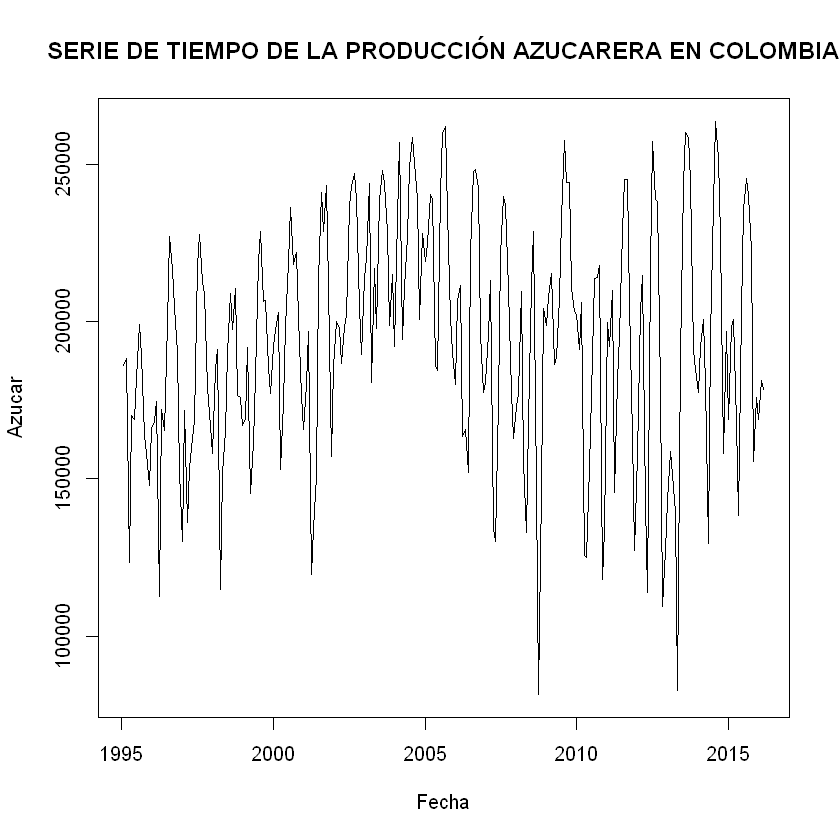

In [4]:
plot(azucar, main="SERIE DE TIEMPO DE LA PRODUCCIÓN AZUCARERA EN COLOMBIA", xlab="Fecha")

claramente la serie no es estacionaria, puesto que no tiene ningun patron, la serie no tiene una media constante al transcurrir los años "la media no es la misma a lo largo del tiempo"", asi  mismo se logra observar una tendencia en los primeros años la cual decrece aproximadamente en los ultimos años.


## Descomposicion basada en suavizamiento exponencial 



## Desarrollo

En referencia a la serie de tiempo, se logra observar que a traves del tiempo la varianza alcanza a aumentar, dado lo anterior se ve la necesidad de estabilixar la varianza, en este orden de ideas se usara la transformacion **Box-Cox** el cual transforma los datos de la serie segun un lambda especifico el cual logre homogeneizar la varianza, dicha transformacion tiene la forma:


$$
f_x(U_t)=\left\{\begin{matrix}
 \lambda^-1 (U^{\lambda}_t - 1) & U_t\geq 0 & \lambda>0\\ 
Ln (U_t) & U_t >0 & \lambda=0
\end{matrix}\right.
$$


Este procedimiento puede ser usaro rapidamente en R por medio del siguiente codigo:

In [6]:
library(forecast)
forecast::BoxCox.lambda(azucar, method = "guerrero", lower = 0, upper = 2) 

[1] 1.999959

Por consiguiente el valor de lambda es cercano a 1,  en este orden de ideas lo mas aconsejable es no realizar una transformacion a los datos, en otras palabras no es necesario estabilizar la varianza:

Como segundo paso, se realiza propiamente el proceso basado en suavizamiento exponencial o metodo Holter-Winters.

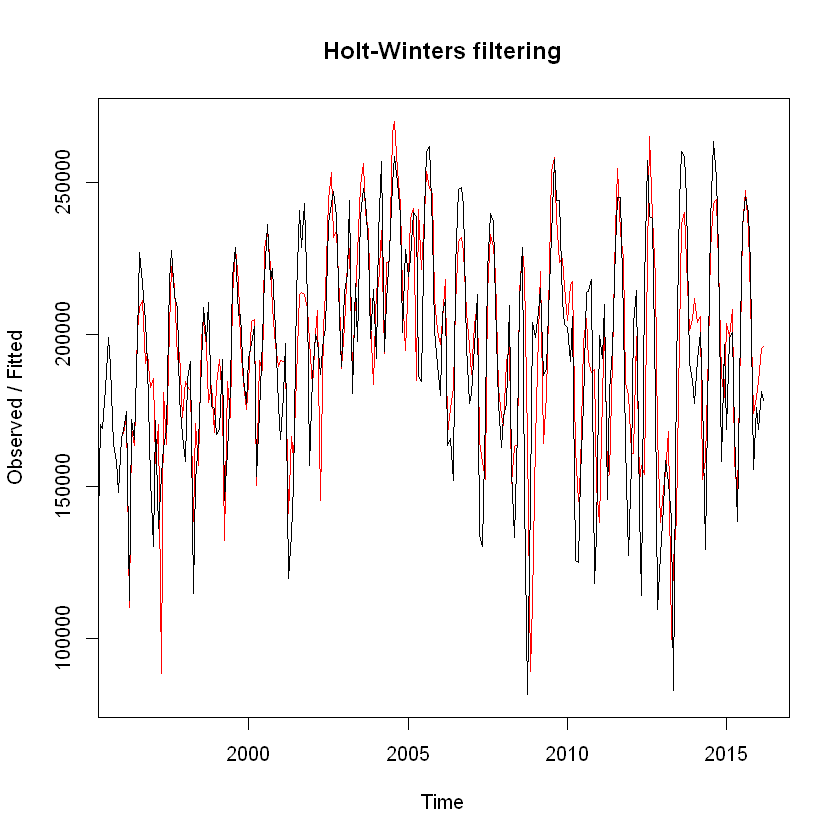

In [7]:
HWAP=HoltWinters(azucar,seasonal="additive")
plot(HWAP)

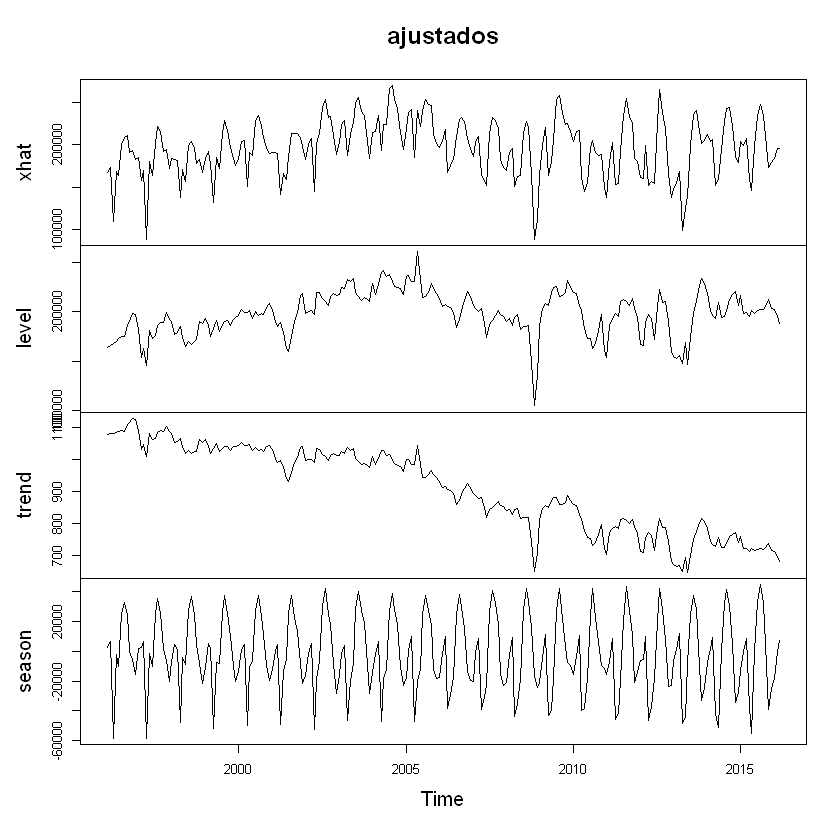

In [8]:
ajustados=fitted(HWAP)
plot(ajustados)

En la grafica anterior puede observarse el resumen del proceso de suavizamiento exponencial realizado, mostrandose en la primera grafica la serie original xhat, en la segunda grafica puede observar la component $a_t$ (level), en la tercera serie se identifica la componente de tendencia y en la última serie se puede observar la componente estacional.

los residuos $Y_t$  la cual es estacional.